# 1. Importing Necessary Libraries and Mounting Google Drive


In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/Datafiles/Nutrition-Summary.csv"
df = pd.read_csv(path)
path2 = "/content/drive/My Drive/Colab Notebooks/Datafiles/Measurement-Summary.csv"
df2 = pd.read_csv(path2)

from IPython.display import display, HTML

import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


# 2. Displaying the DataFrame and Data Cleaning



In [2]:
print(df)


           Date       Meal  Calories  Fat (g)  Saturated Fat  \
0    2018-10-15  Breakfast    1003.0     24.0            6.7   
1    2018-10-15     Dinner     788.8     34.3            9.8   
2    2018-10-15      Lunch     250.0     20.0           17.0   
3    2018-10-15     Snacks    1375.0     31.5            8.7   
4    2018-10-16  Breakfast     834.0     37.0           18.2   
..          ...        ...       ...      ...            ...   
867  2023-07-19  Breakfast    1083.5     35.8           15.3   
868  2023-07-19      Lunch    1335.2     59.5           15.4   
869  2023-07-21  Breakfast    1556.5     70.5           17.1   
870  2023-07-22  Breakfast    1240.0     63.0           22.0   
871  2024-01-17      Lunch     930.0     25.0           10.0   

     Polyunsaturated Fat  Monounsaturated Fat  Trans Fat  Cholesterol  \
0                    1.8                  5.1        0.0        573.3   
1                    7.3                 13.3        0.0        480.4   
2           

In [3]:
print(df2)

          Date  Weight
0   2018-10-14   132.0
1   2018-10-15   133.0
2   2018-10-17   135.0
3   2018-10-18   135.2
4   2018-10-21   135.4
5   2018-10-22   137.0
6   2018-10-23   138.4
7   2018-10-25   138.8
8   2018-10-29   140.2
9   2018-10-31   139.8
10  2018-11-04   142.8
11  2018-11-05   143.0
12  2018-11-15   143.6
13  2018-11-16   144.6
14  2018-11-20   145.0
15  2018-11-27   146.4
16  2019-02-16   147.0
17  2019-02-22   150.0
18  2019-08-26   145.0
19  2019-08-29   147.0
20  2019-09-04   150.8
21  2019-09-21   151.0
22  2019-11-21   153.0
23  2019-12-13   155.2
24  2020-03-17   156.2
25  2020-07-08   148.6
26  2020-11-13   156.6
27  2020-11-17   157.6
28  2020-11-21   160.0
29  2021-02-17   165.0


In [4]:
print(df.columns.to_list())


['Date', 'Meal', 'Calories', 'Fat (g)', 'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium', 'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Note']


In [5]:
zero_count = (df == 0).sum()

columns_to_drop = zero_count[zero_count > 150].index
nutrition_data = df.drop(columns=columns_to_drop)

nutrition_data = nutrition_data.drop(columns=['Note', 'Saturated Fat'])


In [6]:
html = nutrition_data.to_html(classes='table table-bordered', index=False)
scrollable_table = f"""
<div style="overflow-x: auto; max-height: 300px; border: 1px solid #ddd; padding: 5px;">
    {html}
</div>
"""


In [7]:
display(HTML(scrollable_table))

Date,Meal,Calories,Fat (g),Sodium (mg),Carbohydrates (g),Fiber,Sugar,Protein (g)
2018-10-15,Breakfast,1003.0,24.0,424.8,49.8,3.0,22.9,23.0
2018-10-15,Dinner,788.8,34.3,794.0,56.4,0.0,0.3,57.4
2018-10-15,Lunch,250.0,20.0,200.0,36.0,5.0,4.0,19.0
2018-10-15,Snacks,1375.0,31.5,692.0,232.0,12.2,40.0,51.6
2018-10-16,Breakfast,834.0,37.0,184.8,1.8,0.0,0.9,18.0
2018-10-16,Dinner,1030.0,46.0,1620.0,104.0,6.0,4.0,51.0
2018-10-16,Lunch,740.0,30.0,1400.0,83.0,7.0,16.0,32.0
2018-10-16,Snacks,920.0,18.7,141.0,161.0,5.1,17.0,33.3
2018-10-17,Breakfast,1016.0,45.0,479.8,90.8,4.0,31.9,61.0
2018-10-17,Dinner,483.0,12.6,0.0,67.2,8.4,4.2,29.4


#3. Meal Distribution Analysis

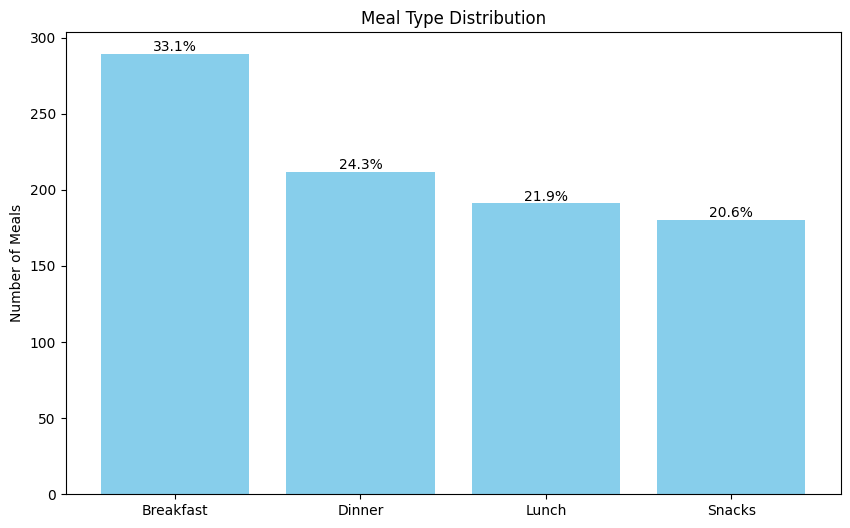

In [8]:
meal_distribution = nutrition_data['Meal'].value_counts()
meal_distribution_percentage = meal_distribution / meal_distribution.sum() * 100

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(meal_distribution.index, meal_distribution, color='skyblue')
plt.title('Meal Type Distribution')
plt.ylabel('Number of Meals')

# Adding percentage annotations
for bar, percent in zip(bars, meal_distribution_percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percent:.1f}%', ha='center', va='bottom')

plt.show()

#4. Nutritional Analysis


In [9]:
avg_nutrition = nutrition_data.groupby('Meal').mean(numeric_only=True)
avg_nutrition.reset_index(inplace=True)
meal_order = ['Breakfast', 'Lunch', 'Dinner', 'Snacks']
avg_nutrition['Meal'] = pd.Categorical(avg_nutrition['Meal'], categories=meal_order, ordered=True)
avg_nutrition = avg_nutrition.sort_values('Meal')
print(avg_nutrition)




        Meal     Calories    Fat (g)  Sodium (mg)  Carbohydrates (g)  \
0  Breakfast   847.751903  33.274740  1049.039100          89.879239   
2      Lunch   795.517277  28.661257  1153.499476          90.734555   
1     Dinner   915.961792  33.808491  1229.376415         101.449528   
3     Snacks  1125.237778  26.536667   736.352778         177.866667   

      Fiber      Sugar  Protein (g)  
0  5.446713  19.893426    36.934602  
2  4.783246  12.331937    35.458115  
1  5.588208  10.957547    46.985849  
3  4.712778  27.797222    44.630556  


In [10]:
from IPython.display import display, HTML
html = avg_nutrition.to_html(classes='table table-bordered', index=False)
display(HTML(html))

Meal,Calories,Fat (g),Sodium (mg),Carbohydrates (g),Fiber,Sugar,Protein (g)
Breakfast,847.751903,33.274740,1049.039100,89.879239,5.446713,19.893426,36.934602
Lunch,795.517277,28.661257,1153.499476,90.734555,4.783246,12.331937,35.458115
Dinner,915.961792,33.808491,1229.376415,101.449528,5.588208,10.957547,46.985849
Snacks,1125.237778,26.536667,736.352778,177.866667,4.712778,27.797222,44.630556


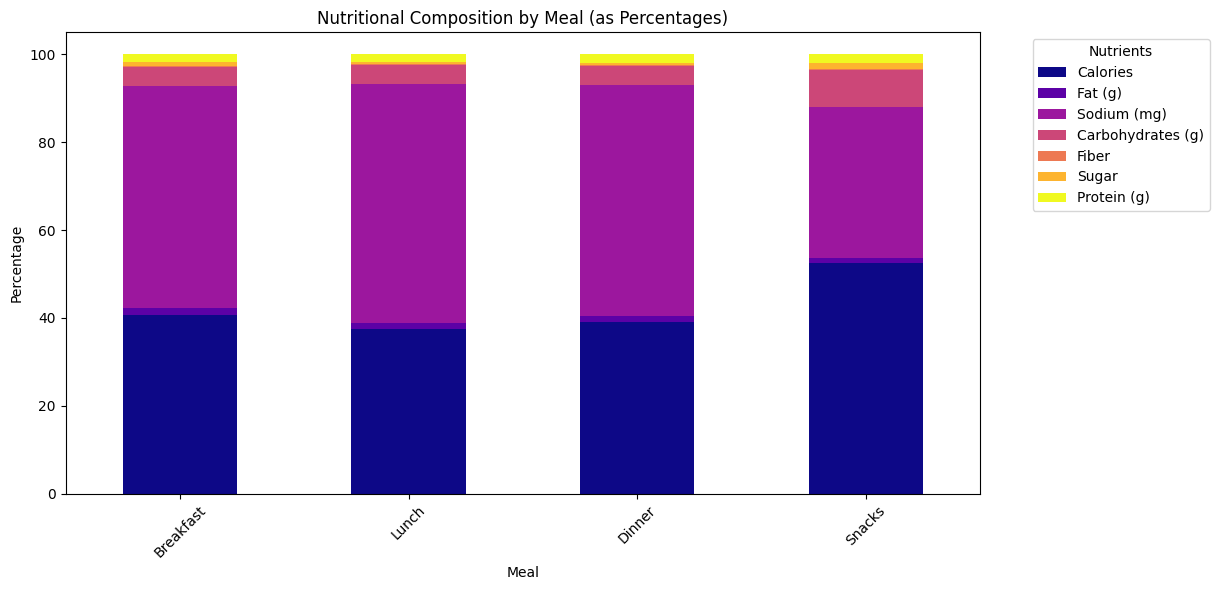

In [11]:
# Convert to percentages
percentage_nutrition = avg_nutrition.set_index('Meal').div(avg_nutrition.set_index('Meal').sum(axis=1), axis=0) * 100

# Plotting
percentage_nutrition.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')

plt.title('Nutritional Composition by Meal (as Percentages)')
plt.xlabel('Meal')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Nutrients')
plt.tight_layout()

plt.legend(title='Nutrients', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

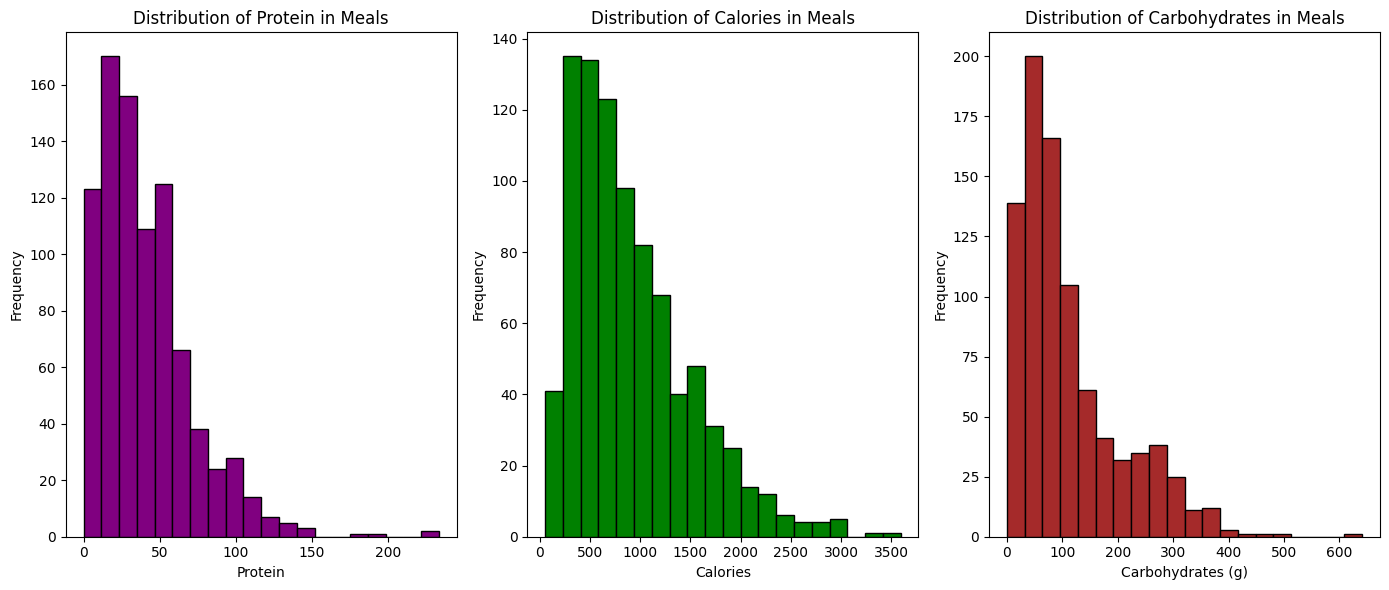

In [12]:
# Plotting histograms
plt.figure(figsize=(14, 6))


# Histogram for Calories
plt.subplot(1, 3, 1)
nutrition_data['Protein (g)'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Protein in Meals')
plt.xlabel('Protein')
plt.ylabel('Frequency')


# Histogram for Calories
plt.subplot(1, 3, 2)
nutrition_data['Calories'].plot(kind='hist', bins=20, color='green', edgecolor='black')
plt.title('Distribution of Calories in Meals')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
nutrition_data['Carbohydrates (g)'].plot(kind='hist', bins=20, color='brown', edgecolor='black')
plt.title('Distribution of Carbohydrates in Meals')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [13]:
# Group by Date and sum the relevant columns
daily_calories = nutrition_data.groupby('Date')['Calories'].sum().reset_index()
daily_calories.columns = ['date', 'total_calories']

daily_carbs = nutrition_data.groupby('Date')['Carbohydrates (g)'].sum().reset_index()
daily_carbs.columns = ['date', 'total_carbs']

daily_protein = nutrition_data.groupby('Date')['Protein (g)'].sum().reset_index()
daily_protein.columns = ['date', 'total_protein']

# Merge the three DataFrames on 'date'
daily_nutrition = pd.merge(daily_calories, daily_carbs, on='date')
daily_nutrition = pd.merge(daily_nutrition, daily_protein, on='date')

# Display the consolidated DataFrame
daily_nutrition




,date,total_calories,total_carbs,total_protein
0,2018-10-15,3416.8,374.2,151.0
1,2018-10-16,3524.0,349.8,134.3
2,2018-10-17,3209.0,458.0,140.7
3,2018-10-18,3149.0,297.0,84.4
4,2018-10-19,3329.0,386.5,103.4
...,...,...,...,...
333,2023-07-09,3594.6,300.5,232.7
334,2023-07-19,2418.7,183.0,110.5
335,2023-07-21,1556.5,127.6,118.1
336,2023-07-22,1240.0,111.0,61.0


#5. Weight Analysis

In [14]:
# Create DataFrame
df2['Date'] = pd.to_datetime(df2['Date'])  # Convert 'Date' to datetime
df2.set_index('Date', inplace=True)  # Set 'Date' as index

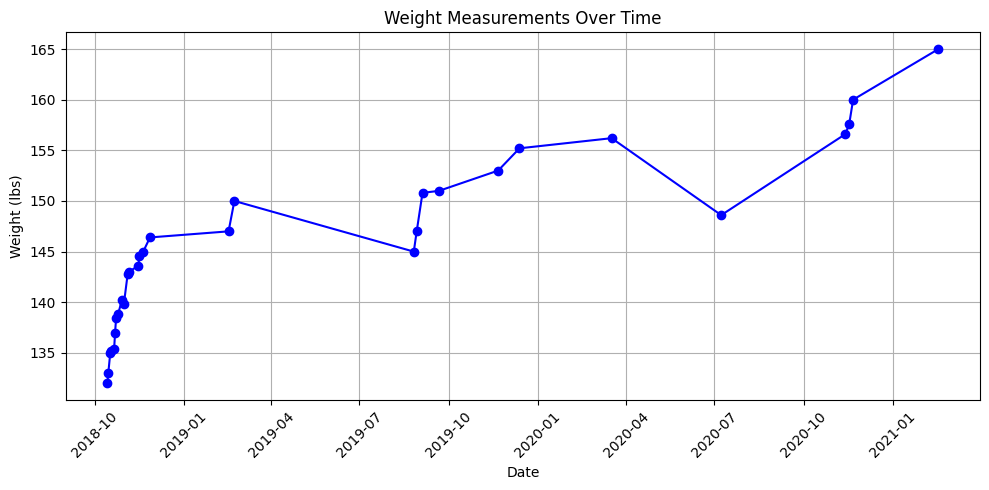

In [15]:
# 2. Plotting the Weight over Time
plt.figure(figsize=(10, 5))
plt.plot(df2.index, df2['Weight'], marker='o', color='blue', linestyle='-')
plt.title('Weight Measurements Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
# 3. Change in Weight
df2['Change in Weight'] = df2['Weight'].diff()
print("Change in Weight:")
print(df2[['Weight', 'Change in Weight']])

Change in Weight:
            Weight  Change in Weight
Date                                
2018-10-14   132.0               NaN
2018-10-15   133.0               1.0
2018-10-17   135.0               2.0
2018-10-18   135.2               0.2
2018-10-21   135.4               0.2
2018-10-22   137.0               1.6
2018-10-23   138.4               1.4
2018-10-25   138.8               0.4
2018-10-29   140.2               1.4
2018-10-31   139.8              -0.4
2018-11-04   142.8               3.0
2018-11-05   143.0               0.2
2018-11-15   143.6               0.6
2018-11-16   144.6               1.0
2018-11-20   145.0               0.4
2018-11-27   146.4               1.4
2019-02-16   147.0               0.6
2019-02-22   150.0               3.0
2019-08-26   145.0              -5.0
2019-08-29   147.0               2.0
2019-09-04   150.8               3.8
2019-09-21   151.0               0.2
2019-11-21   153.0               2.0
2019-12-13   155.2               2.2
2020-03-17   156.2  

In [17]:
# 4. Weight Gain Analysis
weight_gain = df2['Weight'].iloc[-1] - df2['Weight'].iloc[0]
print(f"Total Weight Gain: {weight_gain:.2f} lbs")

Total Weight Gain: 33.00 lbs


In [18]:
# 5. Maximum and Minimum Weight
max_weight = df2['Weight'].max()
min_weight = df2['Weight'].min()
print(f"Maximum Weight: {max_weight:.2f} lbs")
print(f"Minimum Weight: {min_weight:.2f} lbs")

Maximum Weight: 165.00 lbs
Minimum Weight: 132.00 lbs
